# Financial Risk Management: Credit Card Default Prediction

#### Tracy Wang

## 1. Introduction

This project aims to build a classification model to predict whether a credit card client will default on their payment. The dataset used for this analysis is the "Default of Credit Card Clients Dataset," which contains financial, demographic, and repayment history data for 30,000 credit card clients from Taiwan. The dataset spans from April 2005 to September 2005 and includes 25 variables that provide valuable insights into clients' credit behavior.

### Dataset Overview
The dataset contains the following key features:
- **ID**: Unique identifier for each client.
- **LIMIT_BAL**: Amount of credit granted (in NT dollars), including both individual and family credit.
- **SEX**: Gender of the client (1 = male, 2 = female).
- **EDUCATION**: Educational background (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 and 6 = unknown).
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
- **AGE**: Age of the client (in years).
- **PAY_0 to PAY_6**: Repayment status from April to September 2005, with values ranging from -1 (pay duly) to 9 (delay of nine months or more).
- **BILL_AMT1 to BILL_AMT6**: Bill amounts for the months from April to September 2005 (in NT dollars).
- **PAY_AMT1 to PAY_AMT6**: Amounts of previous payments from April to September 2005 (in NT dollars).
- **default.payment.next.month**: The target variable, indicating whether the client defaulted in the next month (1 = yes, 0 = no).

### Problem Statement
The objective of this project is to develop a predictive model that can accurately classify whether a credit card client will default on their payment in the next month, based on their demographic information, credit limit, repayment history, and bill statements.

### Key Questions to Explore:
- How does the probability of default payment vary across different demographic variables such as age, education, and marital status?
- Which features are the most significant predictors of default payment?
  
### Methodology
This project will explore various classification algorithms such as Logistic Regression, Random Forest, LightGBM, and XGBoost. Feature engineering, data preprocessing, and evaluation metrics such as accuracy, precision, recall, and AUC will be employed to identify the best-performing model.

The findings from this project will also be compared with the results presented in a related research paper, which can be accessed through the UCI Machine Learning Repository.

By predicting credit card defaults, this project has potential real-world implications in risk management and can help financial institutions make informed decisions about credit issuance.

## Imports

In [2]:
import os

import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Tracywxr/Credit-Card-Default-Prediction/refs/heads/main/UCI_Credit_Card.csv")

<!-- END QUESTION -->

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>

Split the data into train (70%) and test (30%) portions.

In [6]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=76)
train_df.shape

(21000, 25)

In [7]:
train_df['EDUCATION'].value_counts()

2    9789
1    7522
3    3365
5     197
4      80
6      37
0      10
Name: EDUCATION, dtype: int64

<br><br>

## 3. EDA <a name="3"></a>
<hr>

Perform exploratory data analysis on the train set.

In [8]:
print("n=%d, d=%d" % train_df.shape)
train_df.describe()

n=21000, d=25


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,15011.587619,167563.508571,1.604381,1.843905,1.554667,35.412952,-0.012190,-0.132714,-0.168333,-0.223143,...,43039.813952,40121.889810,38623.497095,5601.265286,6.059441e+03,5204.302571,4889.281333,4782.900857,5162.918714,0.221857
std,8658.232639,129919.112502,0.488995,0.789845,0.521970,9.136302,1.121864,1.196554,1.195375,1.165490,...,63817.414980,60400.798292,59055.005208,16239.423781,2.407470e+04,16865.645456,16486.840852,15431.523094,17170.608569,0.415505
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7493.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2300.000000,1800.000000,1266.250000,1000.000000,8.200000e+02,390.000000,291.000000,257.750000,150.000000,0.000000
50%,15041.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18990.000000,18091.000000,17127.000000,2112.500000,2.009000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22505.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54740.000000,50065.250000,48950.500000,5012.000000,5.000000e+03,4531.250000,4048.500000,4078.000000,4001.000000,0.000000
max,29999.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,568638.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 8958 to 2721
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   2

Seems like there are no missing values and all the columns are encoded as numeric columns. 

In [8]:
print(
    "Fraction that default:\n",
    train_df["default.payment.next.month"].value_counts(normalize=True),
)

Fraction that default:
 default.payment.next.month
0    0.778143
1    0.221857
Name: proportion, dtype: float64


In this dataset, we observe a significant class imbalance, where the majority of the clients (about 77.8%) do not default, while only a small portion (22.2%) actually defaults. This imbalance can skew the performance of many machine learning models, as they may tend to favor the majority class (no default), simply because it appears more frequently. 

Since both the non-default and default classes are important for our analysis, it is crucial that we evaluate the model's performance in a balanced way, giving equal weight to both classes. For this reason, I have chosen the **macro-average F1 score** as our evaluation metric. Unlike accuracy, which may be misleading in imbalanced datasets, the macro-average F1 score calculates the F1 score for each class individually and then averages them, ensuring that the model's performance is measured equally across both classes, regardless of their distribution. This will help us better assess how well the model handles the minority class (defaults) as well as the majority class (non-defaults).

In [10]:
from sklearn.metrics import f1_score, make_scorer, recall_score

custom_scorer = make_scorer(f1_score, average="macro")
scoring_metric = custom_scorer

In [11]:
# Show the maximum values for each feature in the train_df
np.max(train_df, axis=0)

ID                              29999.0
LIMIT_BAL                      800000.0
SEX                                 2.0
EDUCATION                           6.0
MARRIAGE                            3.0
AGE                                79.0
PAY_0                               8.0
PAY_2                               8.0
PAY_3                               8.0
PAY_4                               8.0
PAY_5                               8.0
PAY_6                               8.0
BILL_AMT1                      746814.0
BILL_AMT2                      743970.0
BILL_AMT3                     1664089.0
BILL_AMT4                      706864.0
BILL_AMT5                      823540.0
BILL_AMT6                      568638.0
PAY_AMT1                       873552.0
PAY_AMT2                      1684259.0
PAY_AMT3                       889043.0
PAY_AMT4                       621000.0
PAY_AMT5                       426529.0
PAY_AMT6                       528666.0
default.payment.next.month          1.0


In [12]:
# Show the minimum values for each feature in the train_df
np.min(train_df, axis=0)

ID                                 1.0
LIMIT_BAL                      10000.0
SEX                                1.0
EDUCATION                          0.0
MARRIAGE                           0.0
AGE                               21.0
PAY_0                             -2.0
PAY_2                             -2.0
PAY_3                             -2.0
PAY_4                             -2.0
PAY_5                             -2.0
PAY_6                             -2.0
BILL_AMT1                    -165580.0
BILL_AMT2                     -69777.0
BILL_AMT3                    -157264.0
BILL_AMT4                    -170000.0
BILL_AMT5                     -81334.0
BILL_AMT6                    -209051.0
PAY_AMT1                           0.0
PAY_AMT2                           0.0
PAY_AMT3                           0.0
PAY_AMT4                           0.0
PAY_AMT5                           0.0
PAY_AMT6                           0.0
default.payment.next.month         0.0
dtype: float64

In [13]:
X_train, y_train = (
    train_df.drop(columns=["default.payment.next.month"]),
    train_df["default.payment.next.month"],
)
X_test, y_test = (
    test_df.drop(columns=["default.payment.next.month"]),
    test_df["default.payment.next.month"],
)

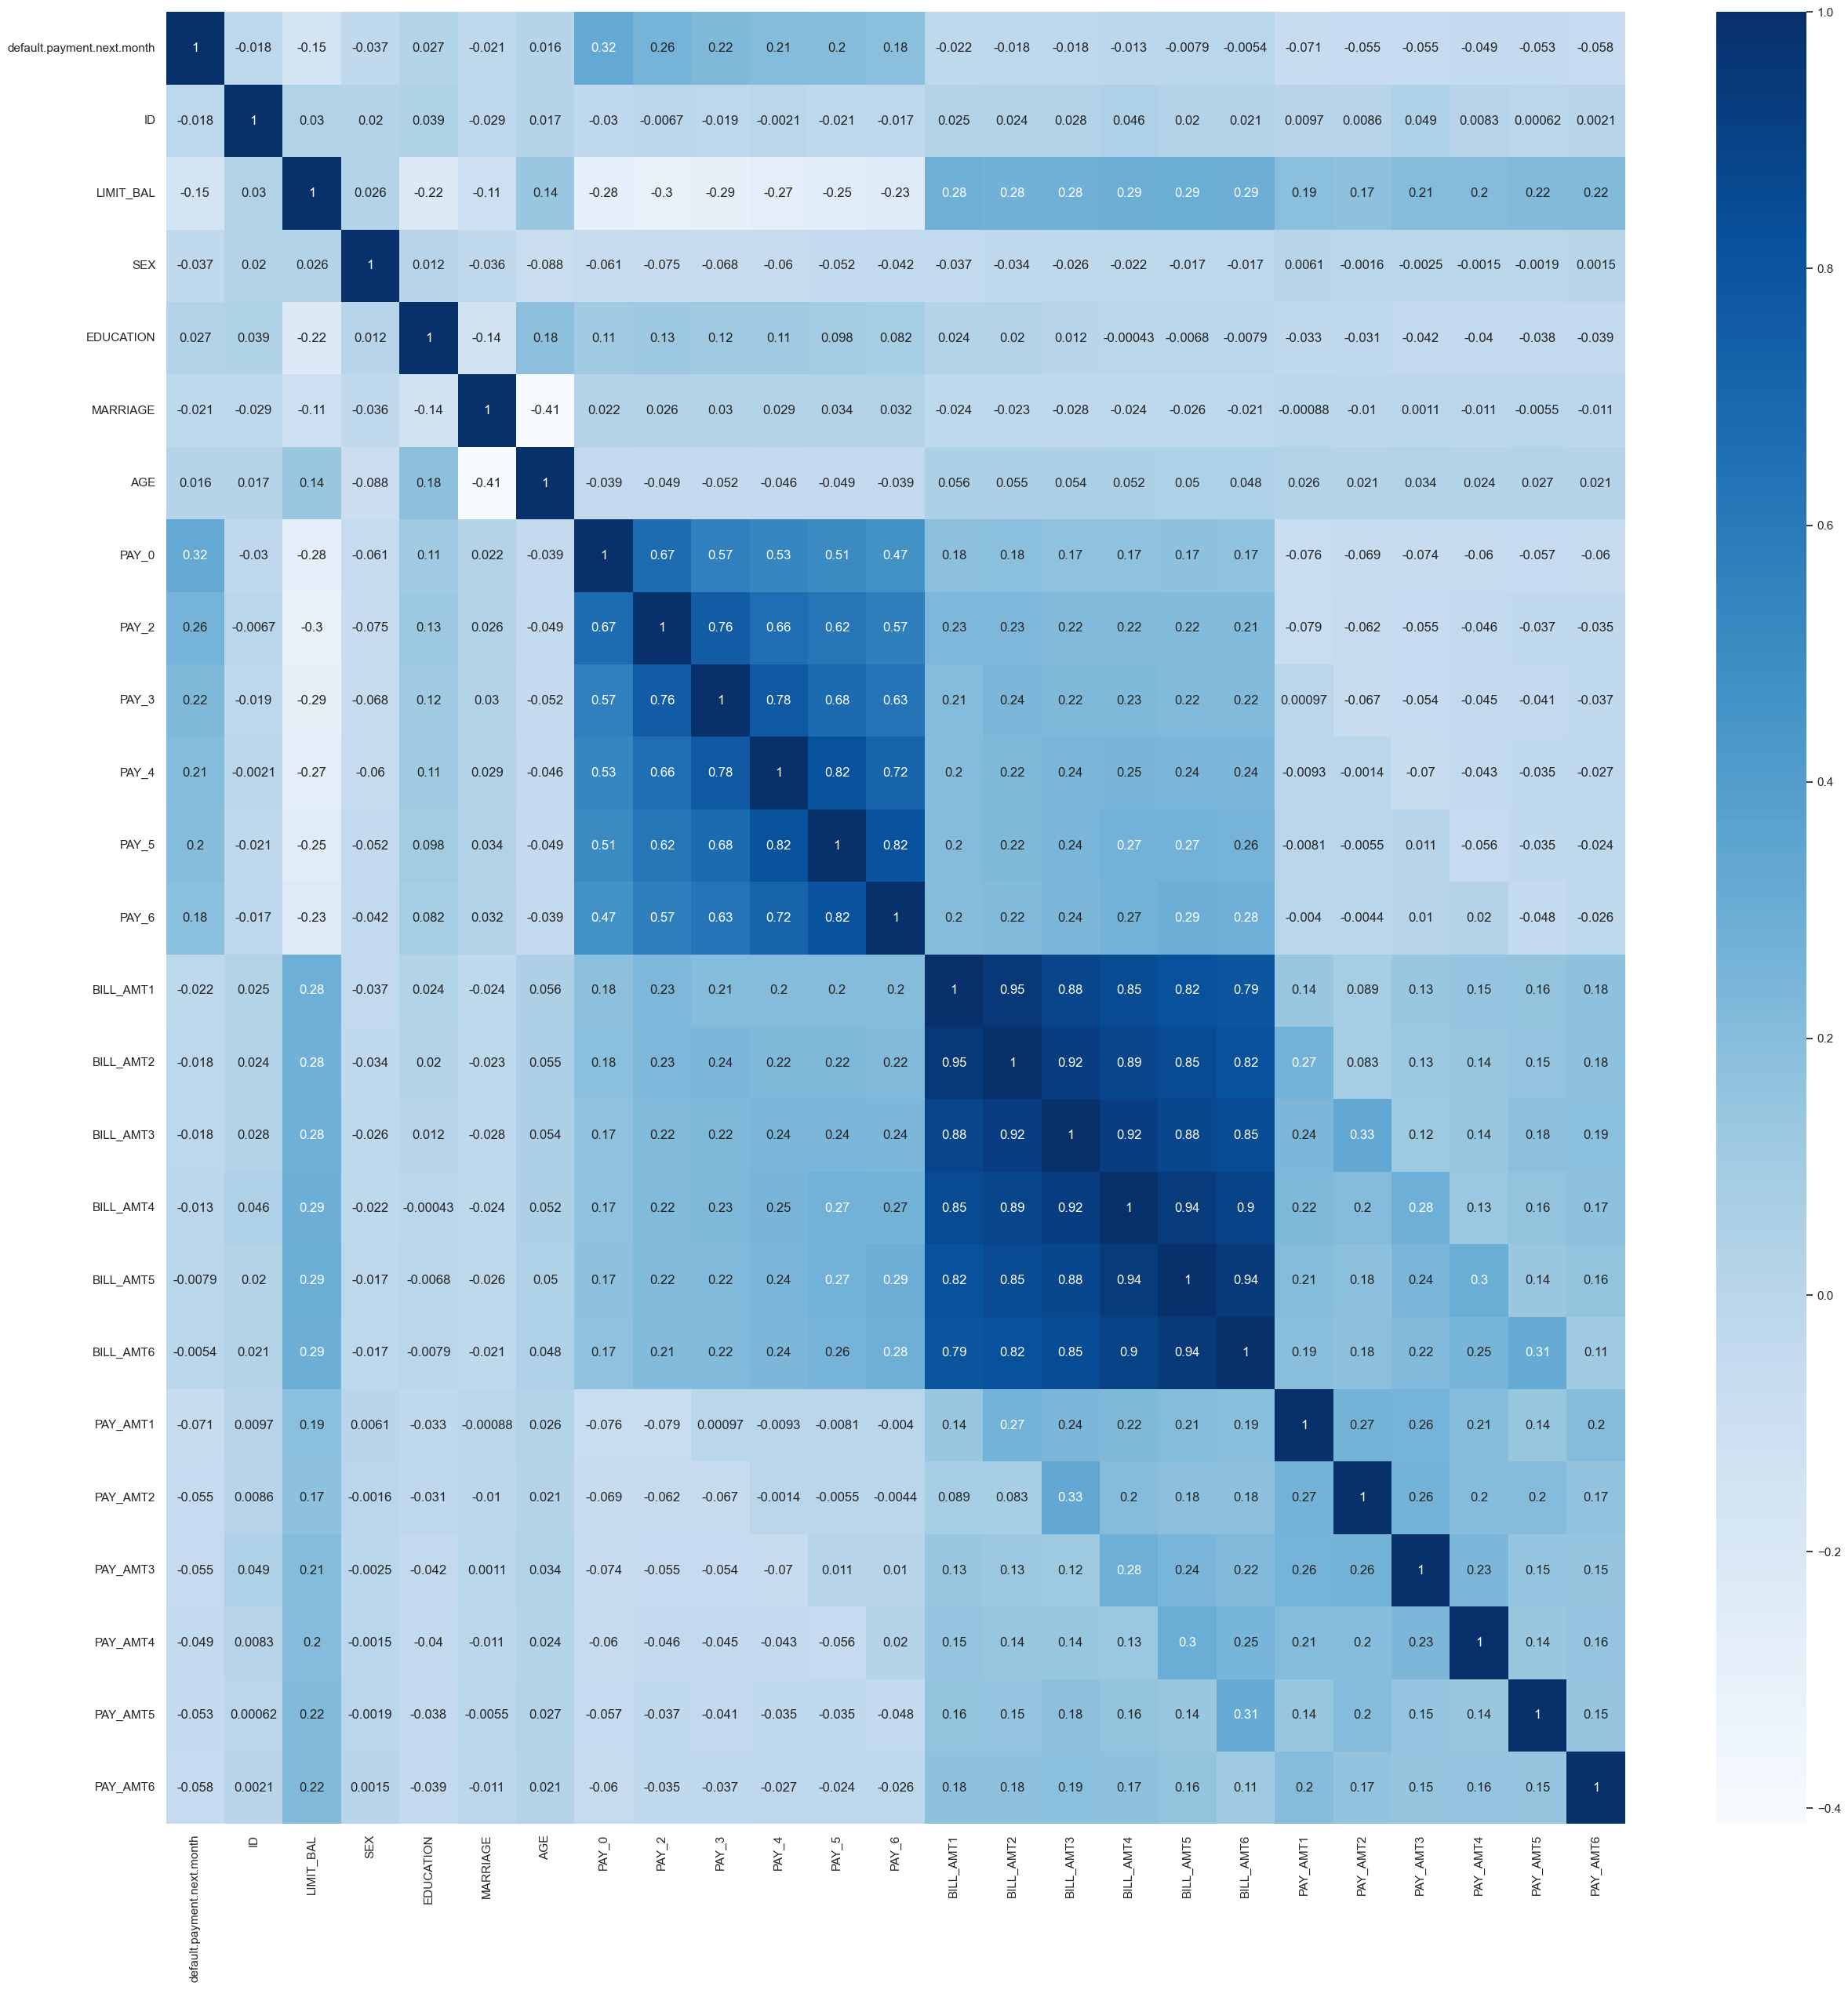

In [14]:
import seaborn as sns
cor = pd.concat((y_train, X_train), axis=1).iloc[:, :30].corr()
plt.figure(figsize=(30, 30))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

Seems like all `PAY_\d*` features and `BILL_AMT\d*` features are highly correlated. 

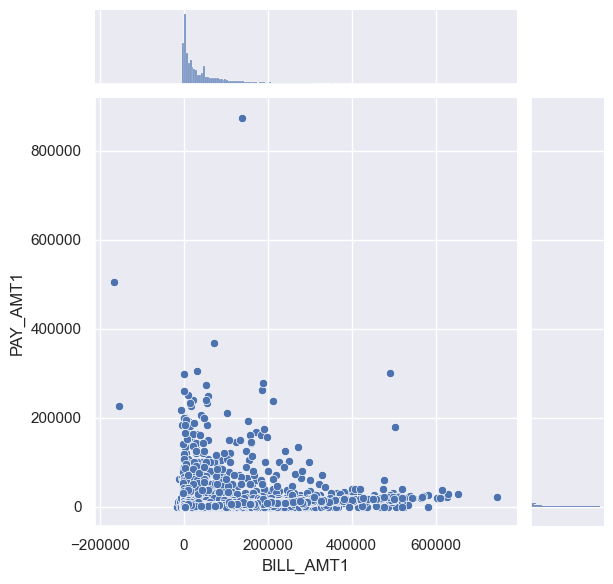

In [15]:
sns.jointplot(x="BILL_AMT1", y="PAY_AMT1", data=train_df);

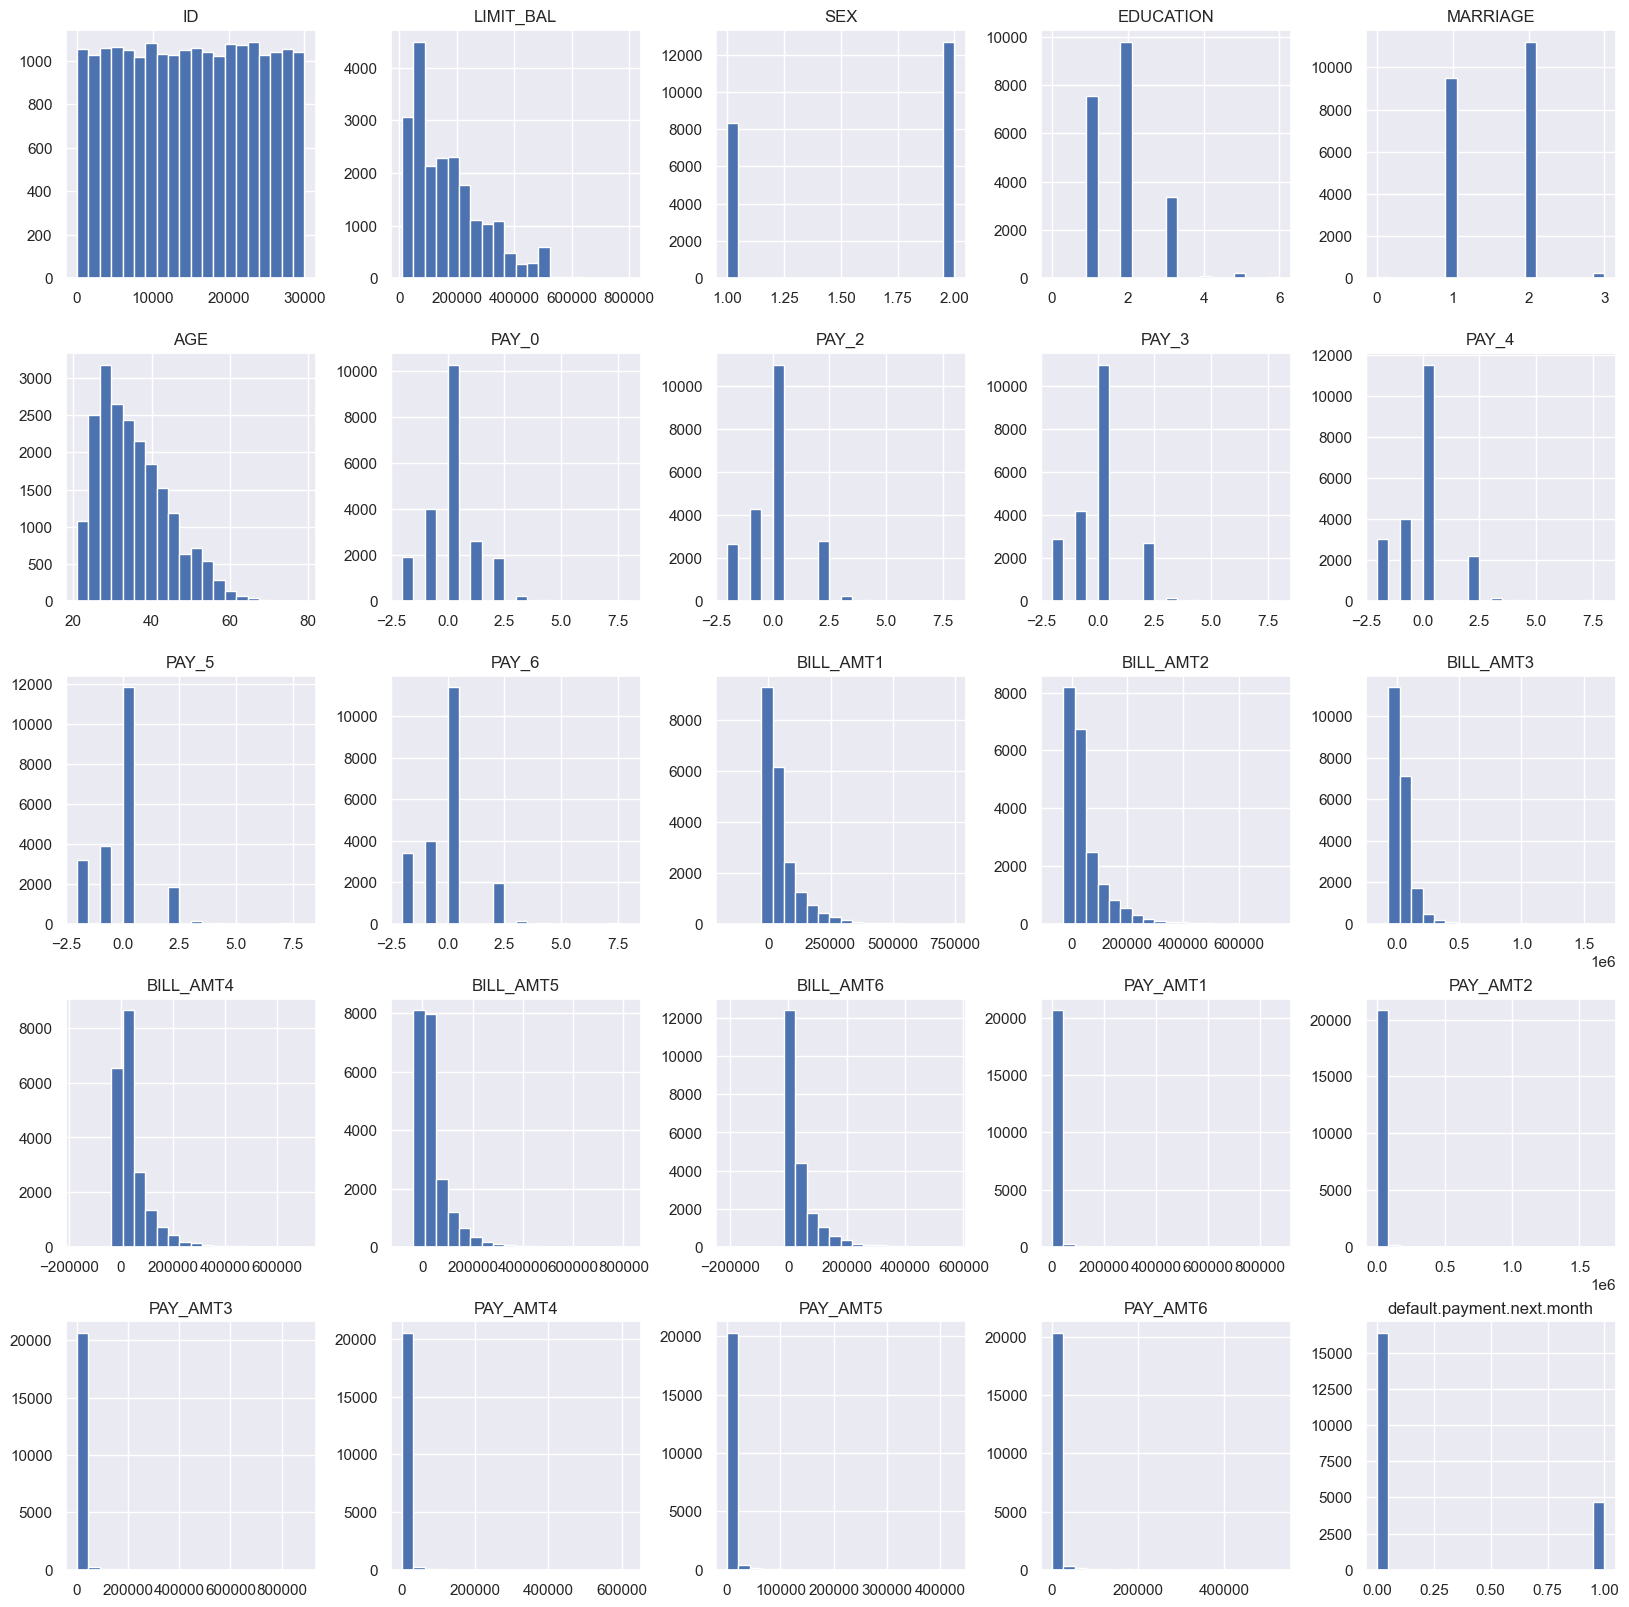

In [16]:
train_df.hist(figsize=(20, 20), bins=20);

We see quite a few outliers for features such as `EDUCATION`, `MARRIAGE`, and `PAY_\d*` features. 

### Initial Observations:

1. **Few Features**: The dataset contains a limited number of features.

2. **Class Imbalance**: The dataset has an imbalance between the two classes (default and no default). To address this, we’ve chosen the macro-average F1 score as our evaluation metric, which gives equal weight to both classes, ensuring that the model doesn't favor the majority class.

3. **Feature Scaling**: The features have different ranges (e.g., credit limits, bill amounts, and payments vary greatly), so it will be essential to standardize or normalize the features before training a model to ensure that features with larger ranges don't disproportionately influence the model.

4. **Collinearity**: There are several collinear features (features that are highly correlated with each other), which could introduce redundancy.

5. **Outliers**: There are quite a few outliers in the dataset (e.g., extremely high bill amounts or payments). Outliers can distort model performance, and it might be beneficial to analyze these values and decide whether to remove or transform them.

6. **Data Inconsistencies**: The data appears to have inconsistencies that don’t align with the provided data description, suggesting the need for further investigation and cleaning.
   - **Education Levels 5 and 6**: The data description only mentions levels 1-4 for education (graduate school, university, high school, others), but the dataset contains levels 5 and 6. These values are either unknown or incorrectly encoded. It would be important to check the distribution of these values and possibly combine or re-label them as 'unknown'.
   - **PAY_\* Variables** : For the `PAY_*` variables (representing repayment status for different months), the value `-2` is not documented clearly. According to UCI documentation, a `-1` typically indicates "paid duly," but `-2` could signify a different special case (e.g., no credit or an error in the dataset). Similarly, a value of `0` could mean "no delay," but it might also need further clarification. Investigating how these values correlate with the target (default or no default) might provide insight into how to treat them during data preprocessing.

Cleaning these issues and applying the appropriate preprocessing steps will help improve the accuracy and reliability of the machine learning model.




<!-- END QUESTION -->

<br><br>

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [17]:
# Identify numeric and categorical features
drop_features = ["ID"]
numeric_features = [
    "LIMIT_BAL",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "AGE",
]
binary_features = ["SEX"]
categorical_features = ["EDUCATION", "MARRIAGE"]
target = "default.payment.next.month"

In [18]:
preprocessor = make_column_transformer(
    ("drop", drop_features),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
)

### Summary of Transformations:
- **Dropped Features**: The `ID` column will be removed.
- **Numeric Features**: Will be scaled using `StandardScaler()` for standardization.
- **Binary Features**: Will be encoded using `OneHotEncoder()` but only one column will be retained for each binary feature to avoid redundancy.
- **Categorical Features**: Will be one-hot encoded, and any unseen categories during inference will be ignored to prevent errors.

This setup ensures that the preprocessing steps are applied correctly based on the type of each feature, preparing the data for model training.

In [19]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

results = {}

<!-- END QUESTION -->

<br><br>

## 5. Baseline model <a name="6"></a>
<hr>

Try `scikit-learn`'s baseline model and report results.

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

In [21]:
dummy = DummyClassifier(strategy="stratified")
results["dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results)

,dummy
fit_time,0.004 (+/- 0.002)
score_time,0.004 (+/- 0.002)
test_score,0.503 (+/- 0.009)
train_score,0.496 (+/- 0.005)


<!-- END QUESTION -->



In [22]:
cross_val_score(dummy, X_train, y_train)

array([0.65380952, 0.64619048, 0.65690476, 0.64738095, 0.65309524])

### Summary of Baseline Model:
The performance of the `DummyClassifier` is close to random predictions, with a validation accuracy of about 49.2% and a training accuracy of 50.2%. These values serve as a baseline for comparison with more complex models. The slightly higher cross-validation scores could be due to the class distribution in the data. The next step would be to use more sophisticated models to improve prediction accuracy and compare their performance against these baseline scores.

<br><br>

## 6. Linear models <a name="7"></a>
<hr>

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 

In [23]:
pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced")
)
results["logreg"] = mean_std_cross_val_scores(
    pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results)

,dummy,logreg
fit_time,0.004 (+/- 0.002),0.351 (+/- 0.056)
score_time,0.004 (+/- 0.002),0.010 (+/- 0.002)
test_score,0.503 (+/- 0.009),0.626 (+/- 0.005)
train_score,0.496 (+/- 0.005),0.629 (+/- 0.004)


In [24]:
from scipy.stats import lognorm, loguniform, randint

param_grid = {"logisticregression__C": loguniform(1e-3, 1e3)}

random_search = RandomizedSearchCV(
    pipe_lr,
    param_grid,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [25]:
print("Best hyperparameter values: ", random_search.best_params_)
print("Best score: %0.3f" % (random_search.best_score_))

pd.DataFrame(random_search.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_logisticregression__C",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]

Best hyperparameter values:  {'logisticregression__C': 0.023419595259846073}
Best score: 0.628


,mean_train_score,mean_test_score,param_logisticregression__C,mean_fit_time,std_test_score
rank_test_score,,,,,
1,0.630885,0.627797,0.02342,0.131304,0.003866
2,0.630829,0.627722,0.022967,0.110610,0.003844
3,0.631402,0.627649,0.01129,0.099829,0.004743
4,0.631401,0.627574,0.012444,0.108885,0.004654
5,0.630902,0.627513,0.031822,0.148743,0.003755
6,0.630384,0.627347,0.0521,0.132737,0.004324
7,0.630647,0.627322,0.00494,0.081416,0.003900
8,0.630234,0.627224,0.057847,0.163766,0.004425
9,0.629952,0.627213,0.074742,0.193336,0.004200


In [26]:
best_logreg = random_search.best_estimator_
results["logreg (tuned)"] = mean_std_cross_val_scores(
    best_logreg, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.004 (+/- 0.002),0.004 (+/- 0.002),0.503 (+/- 0.009),0.496 (+/- 0.005)
logreg,0.351 (+/- 0.056),0.010 (+/- 0.002),0.626 (+/- 0.005),0.629 (+/- 0.004)
logreg (tuned),0.128 (+/- 0.005),0.012 (+/- 0.001),0.628 (+/- 0.004),0.631 (+/- 0.003)


- Logistic regression scores are better than the dummy classifier scores. 
- Optimizing the regularization hyperparameter of logistic regression improved the validation scores slightly (from 0.626 to 0.628) but not by much. 
- In both cases, the model seems to be underfitting, as indicated by the small gap between the training and validation scores. The training score for the tuned logistic regression model is **0.631**, while the validation score is **0.628**, showing minimal overfitting and suggesting that the model isn't complex enough to capture more of the patterns in the data. This might indicate that non-linear models could perform better on this dataset.

<!-- END QUESTION -->

<br><br>

## 7. Different models <a name="8"></a>
<hr>

Try 3 other models aside from a linear model.

In [27]:
ratio = np.bincount(y_train)[0] / np.bincount(y_train)[1]
ratio

3.507405022537025

In [28]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "RBF SVM": SVC(),
    "random forest": RandomForestClassifier(class_weight="balanced", random_state=2),
    "xgboost": XGBClassifier(scale_pos_weight=ratio, random_state=2),
    "lgbm": LGBMClassifier(scale_pos_weight=ratio, random_state=2),
}

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    results[name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

pd.DataFrame(results).T

[LightGBM] [Info] Number of positive: 3727, number of negative: 13073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3274
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221845 -> initscore=-1.254945
[LightGBM] [Info] Start training from score -1.254945
[LightGBM] [Info] Number of positive: 3727, number of negative: 13073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3273
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [b

,fit_time,score_time,test_score,train_score
dummy,0.004 (+/- 0.002),0.004 (+/- 0.002),0.503 (+/- 0.009),0.496 (+/- 0.005)
logreg,0.351 (+/- 0.056),0.010 (+/- 0.002),0.626 (+/- 0.005),0.629 (+/- 0.004)
logreg (tuned),0.128 (+/- 0.005),0.012 (+/- 0.001),0.628 (+/- 0.004),0.631 (+/- 0.003)
RBF SVM,11.929 (+/- 0.776),5.346 (+/- 0.149),0.674 (+/- 0.010),0.687 (+/- 0.002)
random forest,3.085 (+/- 0.034),0.085 (+/- 0.002),0.674 (+/- 0.008),0.999 (+/- 0.000)
xgboost,0.274 (+/- 0.020),0.014 (+/- 0.001),0.671 (+/- 0.003),0.868 (+/- 0.006)
lgbm,0.184 (+/- 0.029),0.019 (+/- 0.001),0.687 (+/- 0.007),0.771 (+/- 0.002)


- I am using four non-linear models here: RBF SVM and three tree-based models. 
- We are trying all models with default hyperparameters. 
- Similar to logistic regression, SVC also seems to underfit; the gap between train and test scores are not large. Also, as expected, it takes longer to `fit` compared to other models. Let's abandon it. 

- LGBM seems to be the best performing model among the tree-based models. It also seems to be much faster and overfitting less compared to random forest and xgboost. That said, it's std is higher than the other two models. 

In [29]:
del models["RBF SVM"]

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

Make some attempts to optimize hyperparameters for the models and summarize results. 

#### Random forest hyperparameter optimization 

In [30]:
param_grid_rf = {
    "randomforestclassifier__n_estimators": randint(low=10, high=100),
    "randomforestclassifier__max_depth": randint(low=2, high=20),
}

pipe_random_forest = make_pipeline(preprocessor, models["random forest"])

In [31]:
random_search_rf = RandomizedSearchCV(
    pipe_random_forest,
    param_grid_rf,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['ID']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                            

In [32]:
 print("Best hyperparameter values: ", random_search_rf.best_params_)
print("Best score: %0.3f" % (random_search_rf.best_score_))

pd.DataFrame(random_search_rf.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_randomforestclassifier__n_estimators",
        "param_randomforestclassifier__max_depth",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]

Best hyperparameter values:  {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__n_estimators': 79}
Best score: 0.703


,mean_train_score,mean_test_score,param_randomforestclassifier__n_estimators,param_randomforestclassifier__max_depth,mean_fit_time,std_test_score
rank_test_score,,,,,,
1,0.814841,0.702521,79,12,1.787216,0.004696
2,0.791901,0.702461,62,11,1.319820,0.002779
3,0.814735,0.702371,67,12,1.578341,0.004218
4,0.768550,0.701786,35,10,0.755372,0.002945
5,0.790128,0.700762,42,11,0.918834,0.003554
6,0.840710,0.700172,68,13,1.687383,0.003731
7,0.837229,0.699833,37,13,0.905429,0.005947
8,0.752394,0.699066,76,9,1.398133,0.003063
9,0.862816,0.698801,40,14,1.029482,0.003735


In [33]:
best_rf_model = random_search_rf.best_estimator_
results["random forest (tuned)"] = mean_std_cross_val_scores(
    best_rf_model, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T 

,fit_time,score_time,test_score,train_score
dummy,0.004 (+/- 0.002),0.004 (+/- 0.002),0.503 (+/- 0.009),0.496 (+/- 0.005)
logreg,0.351 (+/- 0.056),0.010 (+/- 0.002),0.626 (+/- 0.005),0.629 (+/- 0.004)
logreg (tuned),0.128 (+/- 0.005),0.012 (+/- 0.001),0.628 (+/- 0.004),0.631 (+/- 0.003)
RBF SVM,11.929 (+/- 0.776),5.346 (+/- 0.149),0.674 (+/- 0.010),0.687 (+/- 0.002)
random forest,3.085 (+/- 0.034),0.085 (+/- 0.002),0.674 (+/- 0.008),0.999 (+/- 0.000)
xgboost,0.274 (+/- 0.020),0.014 (+/- 0.001),0.671 (+/- 0.003),0.868 (+/- 0.006)
lgbm,0.184 (+/- 0.029),0.019 (+/- 0.001),0.687 (+/- 0.007),0.771 (+/- 0.002)
random forest (tuned),1.853 (+/- 0.028),0.052 (+/- 0.003),0.703 (+/- 0.005),0.815 (+/- 0.003)


#### LGBM hyperparameter optimization 

In [34]:
param_grid_lgbm = {
    "lgbmclassifier__n_estimators": randint(10, 100),
    # "lgbmclassifier__max_depth": randint(low=2, high=20),
    "lgbmclassifier__learning_rate": [0.01, 0.1],
    "lgbmclassifier__subsample": [0.5, 0.75, 1],
}

pipe_lgbm = make_pipeline(
    preprocessor,
    models["lgbm"],
)

In [39]:
random_search_lgbm = RandomizedSearchCV(
    pipe_lgbm,
    param_grid_lgbm,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search_lgbm.fit(X_train, y_train) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 3727, number of negative: 13073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3274
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221845 -> initscore=-1.254945
[LightGBM] [Info] Start training from score -1.254945
[LightGBM] [Info] Number of positive: 3727, number of negative: 13073
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3273
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [bin

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['ID']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_A...
                   n_iter=50, n_jobs=1,
                   param_distributions={'lgbmclassifier__learning_rate': [0.01,
                                                                          0.1],
                                        'lgbmclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2a8e5b250>,
                                        'lgbmclassifier__subsample': [0.5, 0.75,
                                                                      1]},
                   random_state=123, return_train_score=True,
                   scoring=make_scorer(f1_score, response_method='predict', average=macro),
                   verbose=1)

In [40]:
print("Best hyperparameter values: ", random_search_lgbm.best_params_)
print("Best score: %0.3f" % (random_search_lgbm.best_score_))

pd.DataFrame(random_search_lgbm.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_lgbmclassifier__n_estimators",
        "param_lgbmclassifier__learning_rate",
        "param_lgbmclassifier__subsample",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]

Best hyperparameter values:  {'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 13, 'lgbmclassifier__subsample': 0.5}
Best score: 0.702


,mean_train_score,mean_test_score,param_lgbmclassifier__n_estimators,param_lgbmclassifier__learning_rate,param_lgbmclassifier__subsample,mean_fit_time
rank_test_score,,,,,,
1,0.716018,0.701993,13,0.1,0.5,0.106666
2,0.712341,0.701416,11,0.1,1,0.092195
2,0.712341,0.701416,11,0.1,0.5,0.095222
4,0.719044,0.700404,17,0.1,1,0.121093
5,0.704334,0.695475,94,0.01,0.5,0.538431
6,0.719437,0.694075,22,0.1,1,0.135646
7,0.719774,0.692165,24,0.1,1,0.163554
8,0.698725,0.691062,86,0.01,0.5,0.497919
9,0.693424,0.688776,80,0.01,0.75,0.467376


In [41]:
best_lgbm_model = random_search_lgbm.best_estimator_
results["lgbm (tuned)"] = mean_std_cross_val_scores(
    best_lgbm_model, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

[LightGBM] [Info] Number of positive: 3727, number of negative: 13073
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3274
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221845 -> initscore=-1.254945
[LightGBM] [Info] Start training from score -1.254945
[LightGBM] [Info] Number of positive: 3727, number of negative: 13073
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3273
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221845 -> initscore=-1.254945
[LightGBM] [Info] Start training from score -1.254945
[LightGBM] [In

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.001),0.002 (+/- 0.001),0.499 (+/- 0.009),0.501 (+/- 0.003)
logreg,0.048 (+/- 0.013),0.004 (+/- 0.000),0.626 (+/- 0.004),0.629 (+/- 0.004)
logreg (tuned),0.028 (+/- 0.001),0.004 (+/- 0.000),0.628 (+/- 0.005),0.631 (+/- 0.004)
RBF SVM,3.908 (+/- 0.053),1.041 (+/- 0.013),0.674 (+/- 0.010),0.687 (+/- 0.002)
random forest,2.581 (+/- 0.046),0.047 (+/- 0.002),0.676 (+/- 0.007),0.999 (+/- 0.000)
xgboost,0.309 (+/- 0.036),0.007 (+/- 0.001),0.671 (+/- 0.003),0.868 (+/- 0.006)
lgbm,0.590 (+/- 0.060),0.009 (+/- 0.001),0.687 (+/- 0.007),0.771 (+/- 0.002)
random forest (tuned),1.437 (+/- 0.034),0.023 (+/- 0.001),0.704 (+/- 0.006),0.815 (+/- 0.003)
lgbm (tuned),0.105 (+/- 0.009),0.007 (+/- 0.001),0.702 (+/- 0.004),0.716 (+/- 0.003)


**Summary of observations**

Hyperparameter optimization seems to help with random forests as well as LightGBM. The scores for both models seem very similar. But we pick LightGBM because
- it seems to be overfitting less
- it's much faster
- the standard deviation is smaller compared to random forest. 

<!-- END QUESTION -->

<br><br>

In [40]:
import eli5

categorical_OHE = list(
    best_lgbm_model.named_steps["columntransformer"]
    .named_transformers_["onehotencoder-2"]
    .get_feature_names(categorical_features)
)

feature_names = numeric_features + binary_features + categorical_OHE

eli5.show_weights(
    best_lgbm_model.named_steps["lgbmclassifier"],
    feature_names=feature_names,
) 

/Users/lzung/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight,Feature
0.5927,PAY_0
0.0585,PAY_AMT2
0.0431,LIMIT_BAL
0.0417,BILL_AMT1
0.0278,PAY_4
0.0277,PAY_2
0.0275,PAY_3
0.0259,PAY_AMT3
0.0226,PAY_AMT4
0.0195,PAY_AMT1


In [43]:
import shap

preprocessor.fit(X_train, y_train)

X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)

X_train_enc.head()

/Users/lzung/miniconda3/envs/cpsc330/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/lzung/miniconda3/envs/cpsc330/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_m

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
16395,1.168355,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,-0.300665,-0.293394,-0.265310,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21448,2.090017,-0.878738,-0.722412,-0.692571,0.192754,0.232531,0.257059,-0.685307,-0.679495,0.585444,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20034,-0.060527,-1.771246,-1.559598,-1.528626,-1.518801,-1.526210,-1.485154,-0.696132,-0.688319,-0.681234,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25755,-0.367748,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,0.687456,0.752583,0.835581,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1438,-0.905384,0.906278,1.789147,0.143483,0.192754,0.232531,0.257059,-0.040230,-0.031399,-0.287429,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
lgbm_tuned = LGBMClassifier(
    scale_pos_weight=ratio,
    random_state=2,
    learning_rate=random_search_lgbm.best_params_["lgbmclassifier__learning_rate"],
    n_estimators=random_search_lgbm.best_params_["lgbmclassifier__n_estimators"],
    subsample=random_search_lgbm.best_params_["lgbmclassifier__subsample"],
)

lgbm_tuned.fit(X_train_enc, y_train)
lgbm_explainer = shap.TreeExplainer(lgbm_tuned)
lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc) 

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [45]:
values = np.abs(lgbm_shap_values[0]).mean(0)
pd.DataFrame(data=values, index=feature_names, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
)[:10]

,SHAP
PAY_0,0.379010
LIMIT_BAL,0.129931
PAY_AMT2,0.093941
BILL_AMT1,0.086548
PAY_AMT3,0.059370
PAY_2,0.051485
PAY_3,0.050122
PAY_AMT1,0.044178
PAY_AMT4,0.043867
PAY_4,0.039639


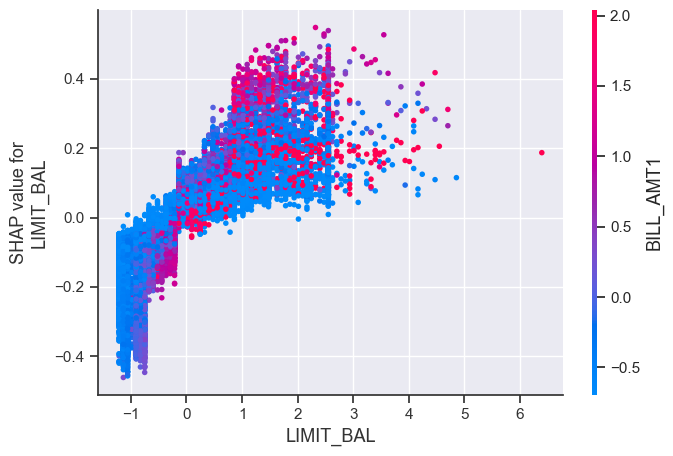

In [46]:
shap.dependence_plot("LIMIT_BAL", lgbm_shap_values[0], X_train_enc)

As `LIMIT_BAL` increases, SHAP values for class 0 increase as well, suggesting that class is likely to be 0 (non default) with higher values for LIMIT_BAL, which makes sense.    

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


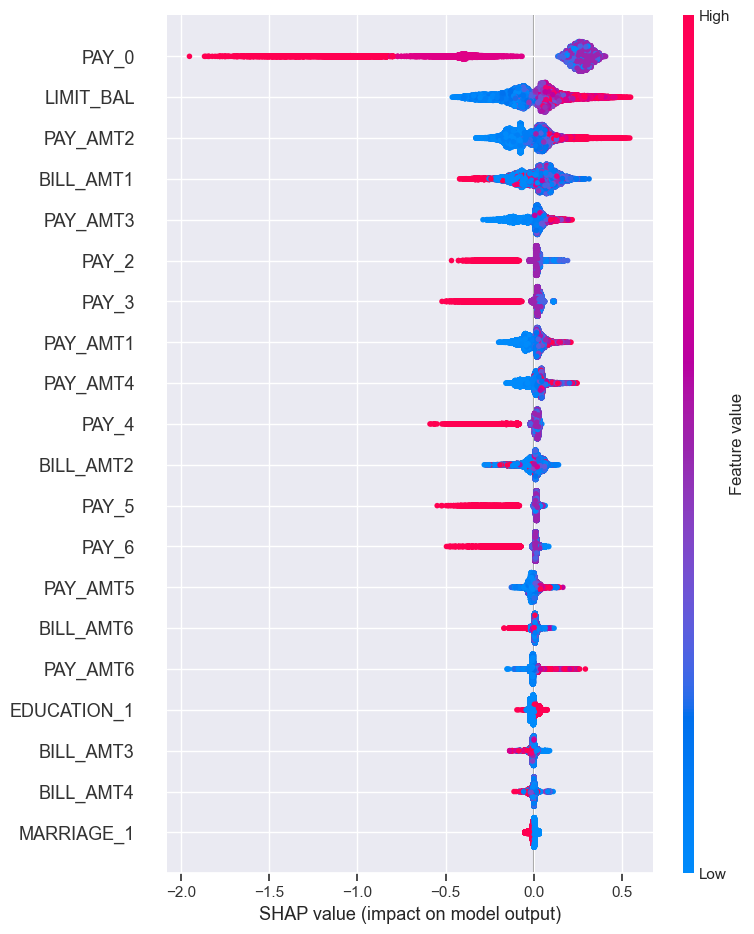

In [47]:
shap.summary_plot(lgbm_shap_values[0], X_train_enc)

In [48]:
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [49]:
lgbm_tuned.predict_proba(X_test_enc)[1]

array([0.74058038, 0.25941962])

In [50]:
lgbm_tuned.predict(X_test_enc, raw_score=True)[1] 

-1.0489872894312522

In [51]:
lgbm_explainer.expected_value

[0.5594117098974121, -0.5594117098974121]

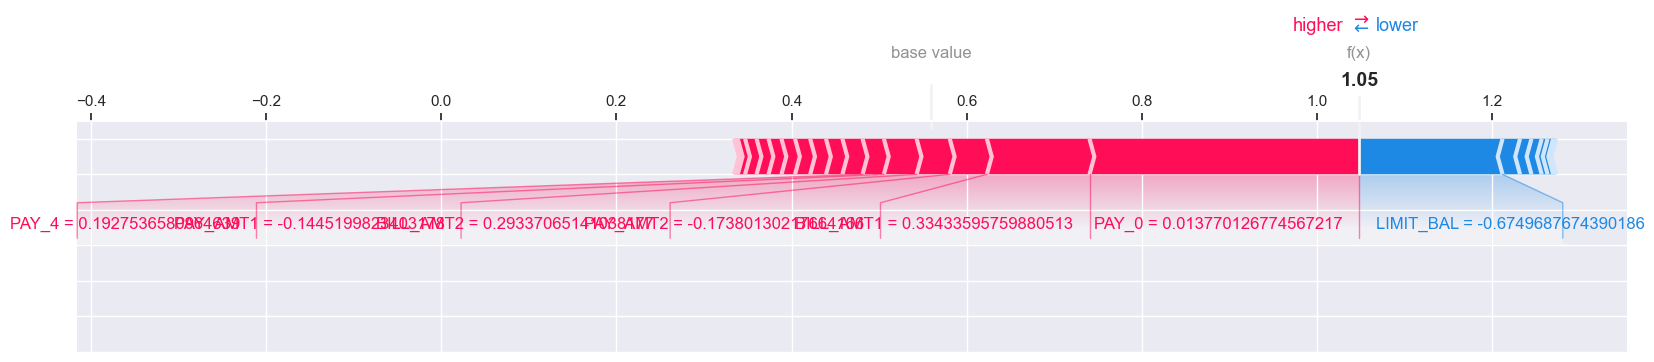

In [52]:
shap.force_plot(
    lgbm_explainer.expected_value[0],
    test_lgbm_shap_values[0][1, :],
    X_test_enc.iloc[1, :],
    matplotlib=True,
)

**Summary of observations**
- From the analysis above we observe that **PAY_\d{0,2,3,4}**, **PAY_AMT**, **LIM_BAL** features seem to be one of the most important features with `PAY_0` being the topmost feature. 
- The SHAP dependence plot demonstrates that the class is likely to be 0 (non default) for higher values for LIMIT_BAL, which makes sense.
- The features `EDUCATION` and `SEX` doesn't seem to influence the prediction much. This might be because of the noise in the `EDUCTION` column; there are a number of unknown values in this column.  

<!-- END QUESTION -->

<br><br>

## 9. Results on the test set <a name="12"></a>
<hr>

perform model on the test data: report and explain test scores.

In [42]:
from sklearn.metrics import f1_score

best_model = random_search_lgbm.best_estimator_
print(
    "Grid Search best model validation score: %0.3f" % (random_search_lgbm.best_score_)
)

predictions = best_model.predict(X_test)
print(
    "Macro-average f1 score on the test set: %0.3f"
    % (f1_score(y_test, predictions, average="macro"))
)

Grid Search best model validation score: 0.702
Macro-average f1 score on the test set: 0.702


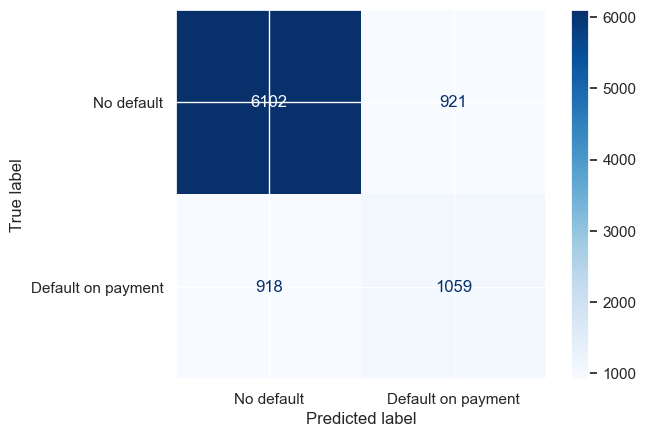

In [46]:
ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    display_labels=["No default", "Default on payment"],
    values_format="d",
    cmap=plt.cm.Blues,
)

In [47]:
print(
    classification_report(
        y_test, predictions, target_names=["No default", "Default on payment"]
    )
)

                    precision    recall  f1-score   support

        No default       0.87      0.87      0.87      7023
Default on payment       0.53      0.54      0.54      1977

          accuracy                           0.80      9000
         macro avg       0.70      0.70      0.70      9000
      weighted avg       0.80      0.80      0.80      9000



The macro-average f1-score (0.695) on the held-out test set is pretty much in line with the macro-average f1-score validation score (0.707). So there doesn't seem to be severe optimization bias here.

<!-- END QUESTION -->

<br><br>

## 10. Summary of results <a name="13"></a>
<hr>

In [48]:
pd.DataFrame(results).T
summary_df = pd.DataFrame(results).T

In [51]:
comments = {
    "dummy": "Baseline of 0.50 macro-average f1 score.",
    "logreg": "Improvement over the baseline but underfitting.",
    "logreg (tuned)": "Slight improvement but still underfitting.",
    "RBF SVM": "Improvement over tuned logistic regression but slow.",
    "random forest": "Improvement over tuned logistic regression but overfitting.",
    "xgboost": "Best results so far and less overfitting compared to random forest.",
    "lgbm": "Improvement over xgboost and less overfitting.",
    "random forest (tuned)": "Hyperparameter optimization helped! Best results so far.",
    "lgbm (tuned)": "Hyperparameter optimization helped. Best results overall! The scores are very similar to random forest scores but picking this as the best model for its speed.",
}
pd.set_option("display.max_colwidth", 0)
summary_df["comments"] = comments.values()
summary_df  

,fit_time,score_time,test_score,train_score,comments
dummy,0.002 (+/- 0.001),0.002 (+/- 0.001),0.499 (+/- 0.009),0.501 (+/- 0.003),Baseline of 0.50 macro-average f1 score.
logreg,0.048 (+/- 0.013),0.004 (+/- 0.000),0.626 (+/- 0.004),0.629 (+/- 0.004),Improvement over the baseline but underfitting.
logreg (tuned),0.028 (+/- 0.001),0.004 (+/- 0.000),0.628 (+/- 0.005),0.631 (+/- 0.004),Slight improvement but still underfitting.
RBF SVM,3.908 (+/- 0.053),1.041 (+/- 0.013),0.674 (+/- 0.010),0.687 (+/- 0.002),Improvement over tuned logistic regression but slow.
random forest,2.581 (+/- 0.046),0.047 (+/- 0.002),0.676 (+/- 0.007),0.999 (+/- 0.000),Improvement over tuned logistic regression but overfitting.
xgboost,0.309 (+/- 0.036),0.007 (+/- 0.001),0.671 (+/- 0.003),0.868 (+/- 0.006),Best results so far and less overfitting compared to random forest.
lgbm,0.590 (+/- 0.060),0.009 (+/- 0.001),0.687 (+/- 0.007),0.771 (+/- 0.002),Improvement over xgboost and less overfitting.
random forest (tuned),1.437 (+/- 0.034),0.023 (+/- 0.001),0.704 (+/- 0.006),0.815 (+/- 0.003),Hyperparameter optimization helped! Best results so far.
lgbm (tuned),0.105 (+/- 0.009),0.007 (+/- 0.001),0.702 (+/- 0.004),0.716 (+/- 0.003),Hyperparameter optimization helped. Best results overall! The scores are very similar to random forest scores but picking this as the best model for its speed.


#### Concluding remarks

All our models beat the baseline. Our best model was LightGBM classifier with tuned hyperparameters. It achieved cross-validation macro-average f1 score of 0.702. The scores do not seem to overfit much; the gap between mean train score (0.716) and mean cross-validation score (0.702) is not big. The tuned random forest is very slightly better with 0.704, but seems to overfit. Also, it's much slower than LightGBM. So we picked LightGBM model as our final model.  

We observed the macro-average f1 score of 0.7 using this model on the held out test set, which is in line with mean cross-validation macro-average f1-score (0.707). So there doesn't seem to be severe optimization bias here.

#### Other ideas
    
- Preprocessing and feature engineering     
    - The `BILL_AMT*` and `PAY_AMT*` variables are the bill amount, and amount paid, respectively. We could try making new features by subtracting or otherwise combining these, which would be the amount you paid relative to the amount owed.
    - There are a number of collinear features in the dataset, especially, our `PAY_\d{0,5}` features, which are one of the topmost important features. We could create new features by combining these features.     
    - More data cleaning would probably help. 
    - In my opinion, data cleaning and feature engineering are very important here.
    
- More careful hyperparameter optimization 
    - Because of limited time, we did not carry out extensive hyperparameter optimization. For instance, we didn't carry out hyperparameter optimization with the XGBoost model. It might be worth exploring this area a bit more.  

<!-- END QUESTION -->

<br><br>